# Library

In [72]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Data Load 

In [ ]:
reviews_path = r"./Grab/Review.csv"
reviews = pd.read_csv(reviews_path, encoding='utf-8')

restaurants_path = r"./Grab/Restaurant (1).csv"
restaurants = pd.read_csv(restaurants_path, encoding='utf-8')

district_path = r"./Grab/District.csv"
districts = pd.read_csv(district_path, encoding='utf-8')

In [ ]:
foody_reviews_path = r"./Grab/Foody_Review.csv"
foody_reviews = pd.read_csv(foody_reviews_path, encoding='utf-8')

foody_restaurant_path = r"./Grab/Foody_Restaurant.csv"
foody_restaurant = pd.read_csv(foody_restaurant_path, encoding='utf-8')

In [46]:
print("Number of reviews:", len(reviews))
print("Number of restaurants:", len(restaurants))
print("Number of districts:", len(districts))

Number of reviews: 7705294
Number of restaurants: 119678
Number of districts: 53


# Foody

In [ ]:
def classify_length(length):
    if length <= 15:
        return "Short (0-15)"
    elif length <=49:
        return "Medium (16-49)"
    elif length <=99:
        return "Long (49-99)"
    else:
        return "Very Long (>99)"


# Gán độ dài
foody_reviews['review_text_length'] = foody_reviews['review_text'].apply(lambda x: len(str(x)))
foody_reviews['length_group'] = foody_reviews['review_text_length'].apply(classify_length)

# Tính % phân bố
length_dist = foody_reviews['length_group'].value_counts(normalize=True).mul(100).round(2).reset_index()
length_dist.columns = ['Length Group', 'Percentage']
print(length_dist)

In [8]:
# show the review_text with the highest length
max_length_review = foody_reviews.loc[foody_reviews['review_text_length'].idxmax(), 'review_text']
# show the review_text with the shortest length
min_length_review = foody_reviews.loc[foody_reviews['review_text_length'].idxmin(), 'review_text']
print(f"Longest review: {max_length_review}")
print(f"Shortest review: {min_length_review}")

Longest review: trên menu thì ko để rau thêm, nước chấm thêm, order t xin thêm thì shipper tới quán báo phụ thu 10 ngàn. Quán khó chịu với khách, thái độ rất tồi. T người nha trang t rành cái sốt này làm chả tốn bao nhiêu tiền, trong khi nc sốt của quán lõng loẹt toàn nước với bột mà khách xin thêm còn tiếc với khách, rau cũng tính tiền mà rau thì dơ héo úa. 10 ngàn chả đáng là bao, t order đồ của quán không dưới 3 lần mà thái độ lần này thật sự quá tệ. Lần mua hàng này không vui vẻ gì, mong quán buôn xui bán ế, Không hợp khẩu vị, Sai/Thiếu món, Không làm đúng ghi chú, Đóng gói chưa tốt, Không đảm bảo vệ sinh, 
Shortest review: b


In [9]:
foody_reviews.loc[foody_reviews['review_text_length'].idxmin()]

rating_id                     1928542.0
restaurant_id                     196.0
user_name             Nguyễn Hoàng Long
rating                              5.0
review_text                           b
review_time            22:11 12/08/2023
user_id                          6070.0
platform_id                         0.0
review_text_length                    1
length_group               Short (0-99)
Name: 24563, dtype: object

In [10]:
foody_reviews.loc[foody_reviews['review_text_length'].idxmax()]

rating_id                                                     1398402.0
restaurant_id                                                   14616.0
user_name                                                Quỳnh Xinh Đẹp
rating                                                              1.0
review_text           trên menu thì ko để rau thêm, nước chấm thêm, ...
review_time                                            14:39 14/05/2023
user_id                                                        117085.0
platform_id                                                         0.0
review_text_length                                                  602
length_group                                             Long (500-999)
Name: 3335790, dtype: object

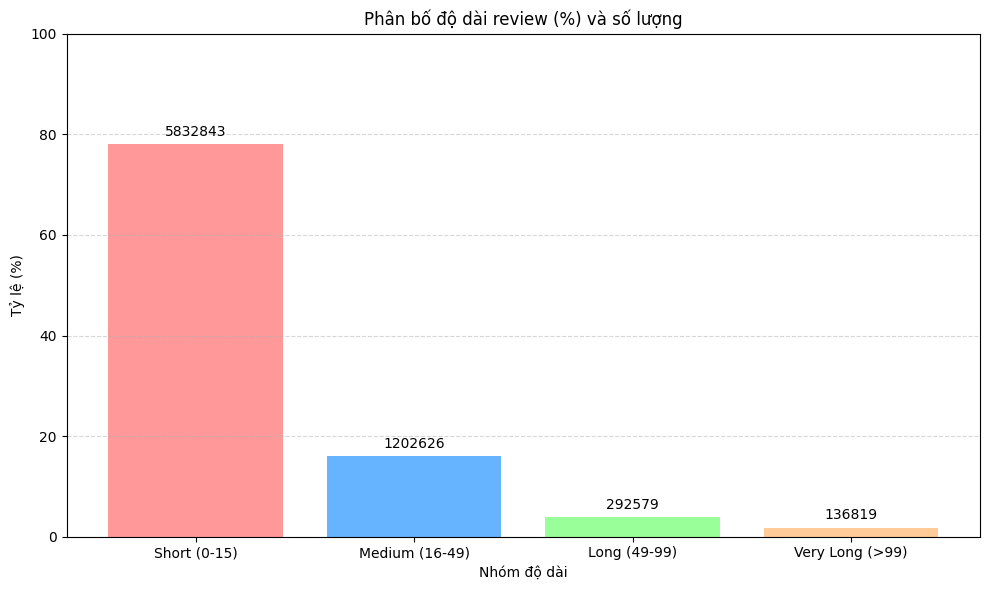

In [27]:
length_dist = foody_reviews["length_group"].value_counts().reset_index()
length_dist.columns = ["Length Group", "Count"]
length_dist["Percentage"] = (length_dist["Count"] / length_dist["Count"].sum() * 100).round(2)

# Vẽ biểu đồ
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']
plt.figure(figsize=(10, 6))
bars = plt.bar(length_dist['Length Group'], length_dist['Percentage'], color=colors)

# Thêm số lượng
for bar, count in zip(bars, length_dist['Count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1, f'{count}', ha='center', va='bottom', fontsize=10)

plt.title("Phân bố độ dài review (%) và số lượng")
plt.ylabel("Tỷ lệ (%)")
plt.xlabel("Nhóm độ dài")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [12]:
# average length of reviews 
average_length = foody_reviews['review_text_length'].mean()
median_length = foody_reviews['review_text_length'].median()
print(f"Average length of reviews: {average_length}")
print(f"Median length of reviews: {median_length}")

Average length of reviews: 14.513029636027005
Median length of reviews: 3.0


   Rating  Percentage
0     4.0       54.40
1     3.0       24.20
2     5.0       10.88
3     2.0        5.59
4     1.0        4.89
5     0.0        0.03


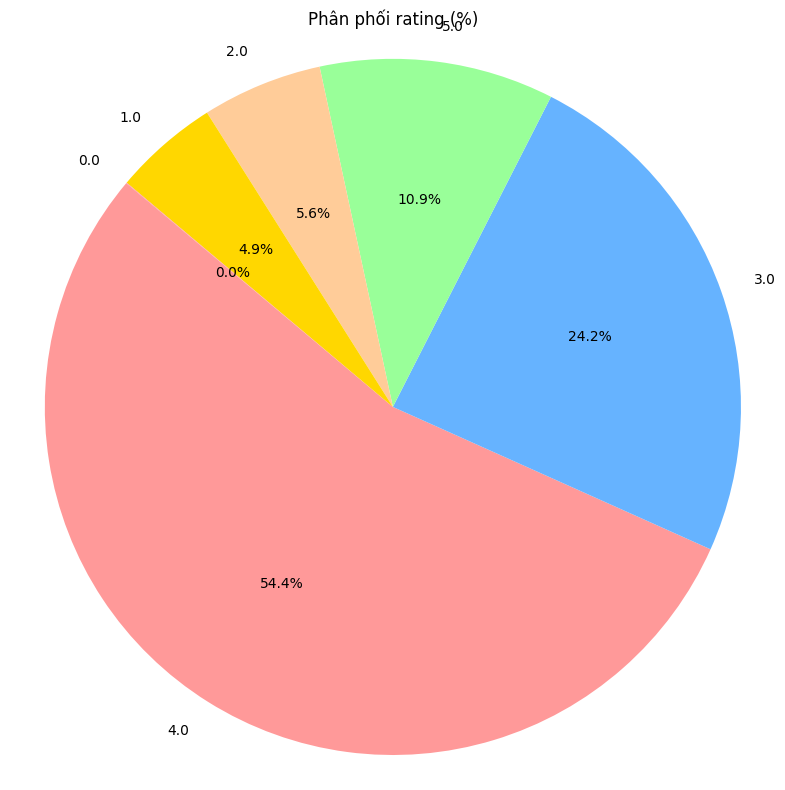

In [31]:
# distribution of rating pie chart
rating_dist = foody_reviews['rating'].value_counts(normalize=True).mul(100).round(2).reset_index()
rating_dist.columns = ['Rating', 'Percentage']
print(rating_dist)
# Vẽ biểu đồ phân phối rating
plt.figure(figsize=(8, 8))
plt.pie(rating_dist['Percentage'], labels=rating_dist['Rating'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Phân phối rating (%)")
plt.axis('equal')  # Đảm bảo hình tròn
plt.tight_layout()
plt.show()

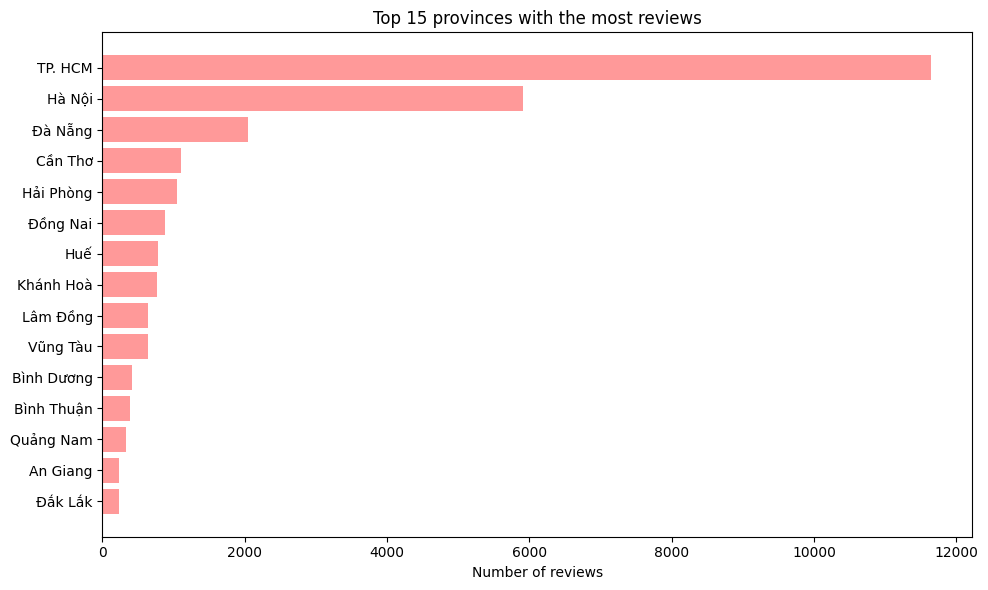

In [ ]:
district_count = foody_restaurant['city'].value_counts()

top15 = district_count.sort_values("count", ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(top15["city"], top15["count"], color="#FF9999")
plt.gca().invert_yaxis()  # đảo ngược trục y để top lên đầu
plt.xlabel("Number of reviews")
plt.title("Top 15 provinces with the most reviews")
plt.tight_layout()
plt.show()

# Merge 2 Platform

In [53]:
# Tính trung bình rating thực tế từ bảng review
avg_rating = reviews.groupby("restaurant_id")["rating"].mean().reset_index()
avg_rating.columns = ["restaurant_id", "avg_review_rating"]
df_merged = restaurants.merge(avg_rating, on="restaurant_id", how="left")
df_merged[["restaurant_id", "restaurant_name", "restaurant_rating", "avg_review_rating"]].head()

,restaurant_id,restaurant_name,restaurant_rating,avg_review_rating
0,B_1,Cơm Cháy Tròn,4.92,5.000000
1,B_10,Ăn Vặt Chang Ú - Ăn Vặt - Nguyễn Trãi,3.22,2.666667
2,B_100,Bún Mọc & Bún Thái - Bùi Hữu Nghĩa,0.00,NaN
3,B_1000,Bánh Mì Chị Hai - Nguyễn Thị Huỳnh,4.99,5.000000
4,B_10000,Papaxốt - Phạm Hùng,4.49,4.524804


In [ ]:
city_avg_rating = df_merged.groupby("city_id")["avg_review_rating"].mean().reset_index()
city_avg_rating.columns = ["city_id", "avg_review_rating"]
print(city_avg_rating.sort_values("avg_review_rating", ascending=False))

   city_id  avg_review_rating
0        1           4.462972
1        2           4.348712


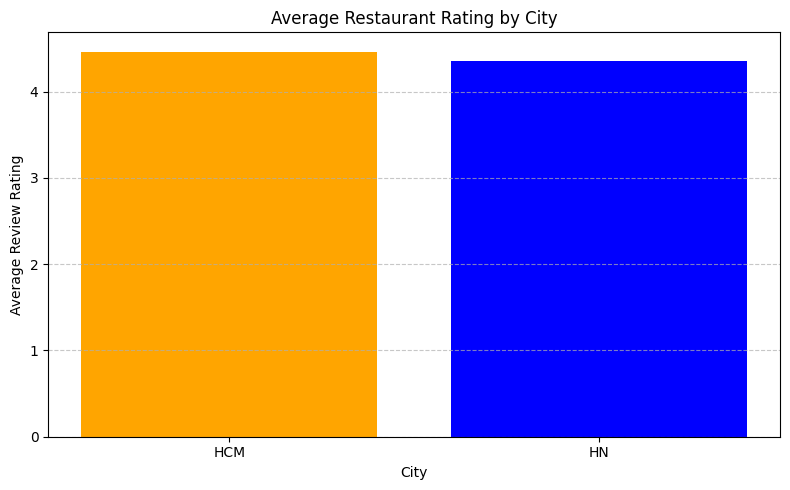

In [ ]:
# Average Restaurant Rating by City
# Mapping city_id sang tên thành phố
city_name_map = {
    1: "HCM",
    2: "HN"
}
city_avg_rating["city_name"] = city_avg_rating["city_id"].map(city_name_map)

# Gán màu khác nhau cho từng cột
colors = ["orange", "blue"]

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.bar(city_avg_rating["city_name"], city_avg_rating["avg_review_rating"], color=colors)
plt.xlabel("City")
plt.ylabel("Average Review Rating")
plt.title("Average Restaurant Rating by City")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

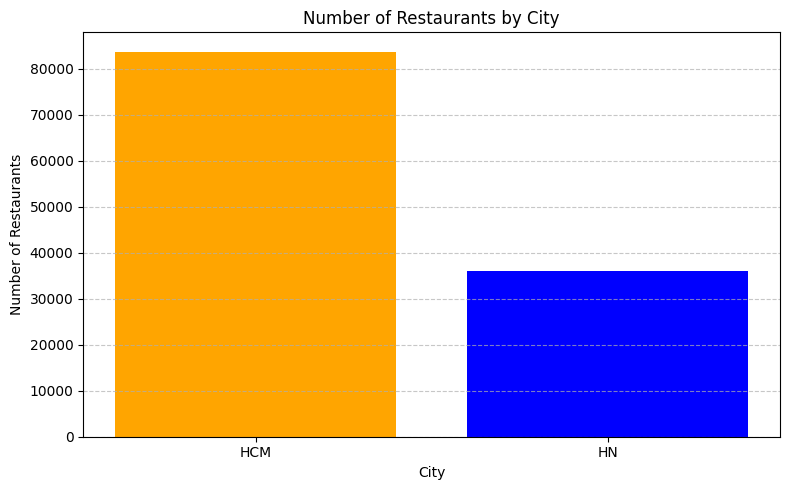

In [ ]:
# Number of restaurants by city
city_restaurant_count = restaurants.groupby("city_id")["restaurant_id"].count().reset_index()
city_restaurant_count.columns = ["city_id", "restaurant_count"]

city_restaurant_count["city_name"] = city_restaurant_count["city_id"].map(city_name_map)

plt.figure(figsize=(8, 5))
plt.bar(city_restaurant_count["city_name"], city_restaurant_count["restaurant_count"], color=["orange", "blue"])
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.title("Number of Restaurants by City")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


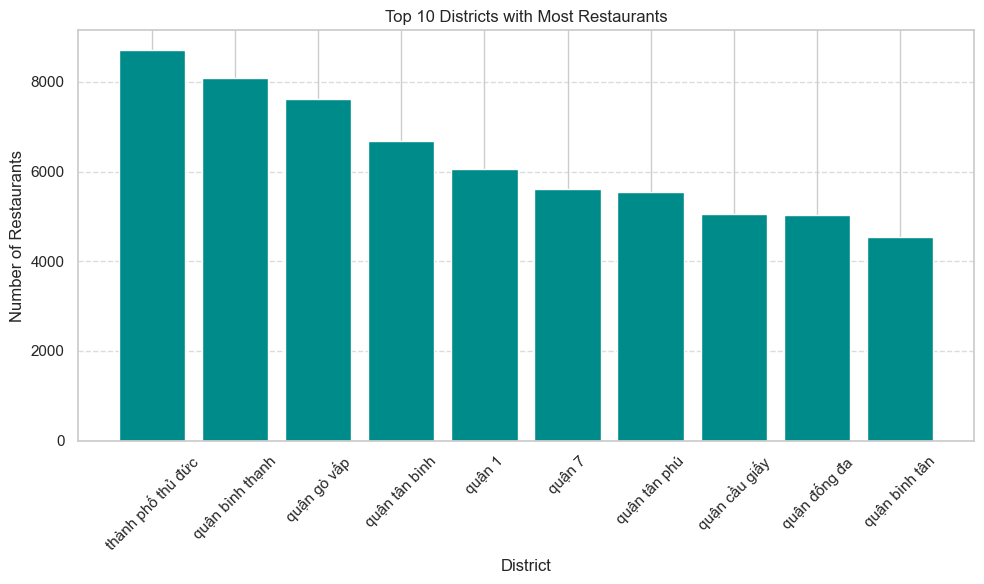

In [ ]:
# Top 10 Districts with Most Restaurants
district_count = (
    restaurants.groupby("district_id")["restaurant_id"]
    .count()
    .reset_index()
    .rename(columns={"restaurant_id": "restaurant_count"})
)
district_count = district_count.merge(districts, on="district_id", how="left")
top10_districts = district_count.sort_values("restaurant_count", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top10_districts["district_name"], top10_districts["restaurant_count"], color="darkcyan")
plt.xlabel("District")
plt.ylabel("Number of Restaurants")
plt.title("Top 10 Districts with Most Restaurants")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

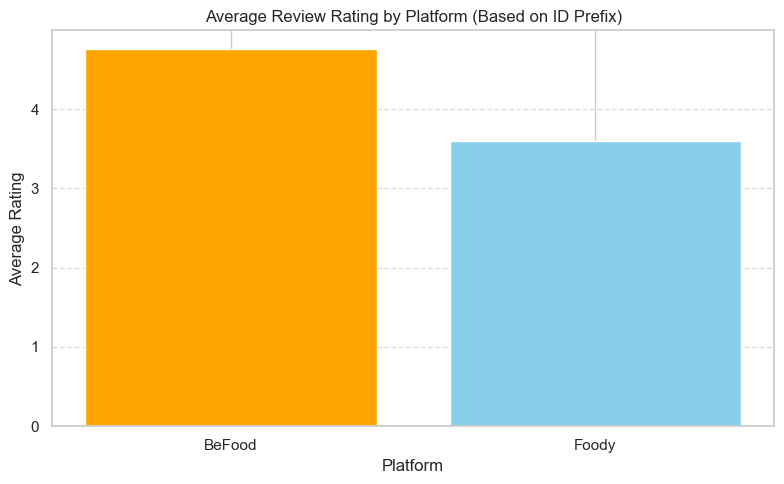

In [ ]:
# Average Review Rating by Platform
# Map platform theo prefix
def get_platform(restaurant_id):
    if isinstance(restaurant_id, str):
        if restaurant_id.startswith("B_"):
            return "BeFood"
        elif restaurant_id.startswith("F_"):
            return "Foody"
    return "Unknown"

reviews["platform"] = reviews["restaurant_id"].apply(get_platform)

# Tính trung bình rating theo platform
platform_avg = reviews.groupby("platform")["rating"].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.bar(platform_avg["platform"], platform_avg["rating"], color=["orange", "skyblue"])
plt.xlabel("Platform")
plt.ylabel("Average Rating")
plt.title("Average Review Rating by Platform (Based on ID Prefix)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\vumin\AppData\Local\Temp\ipykernel_10192\3853664771.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\vumin\AppData\Local\Temp\ipykernel_10192\3853664771.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


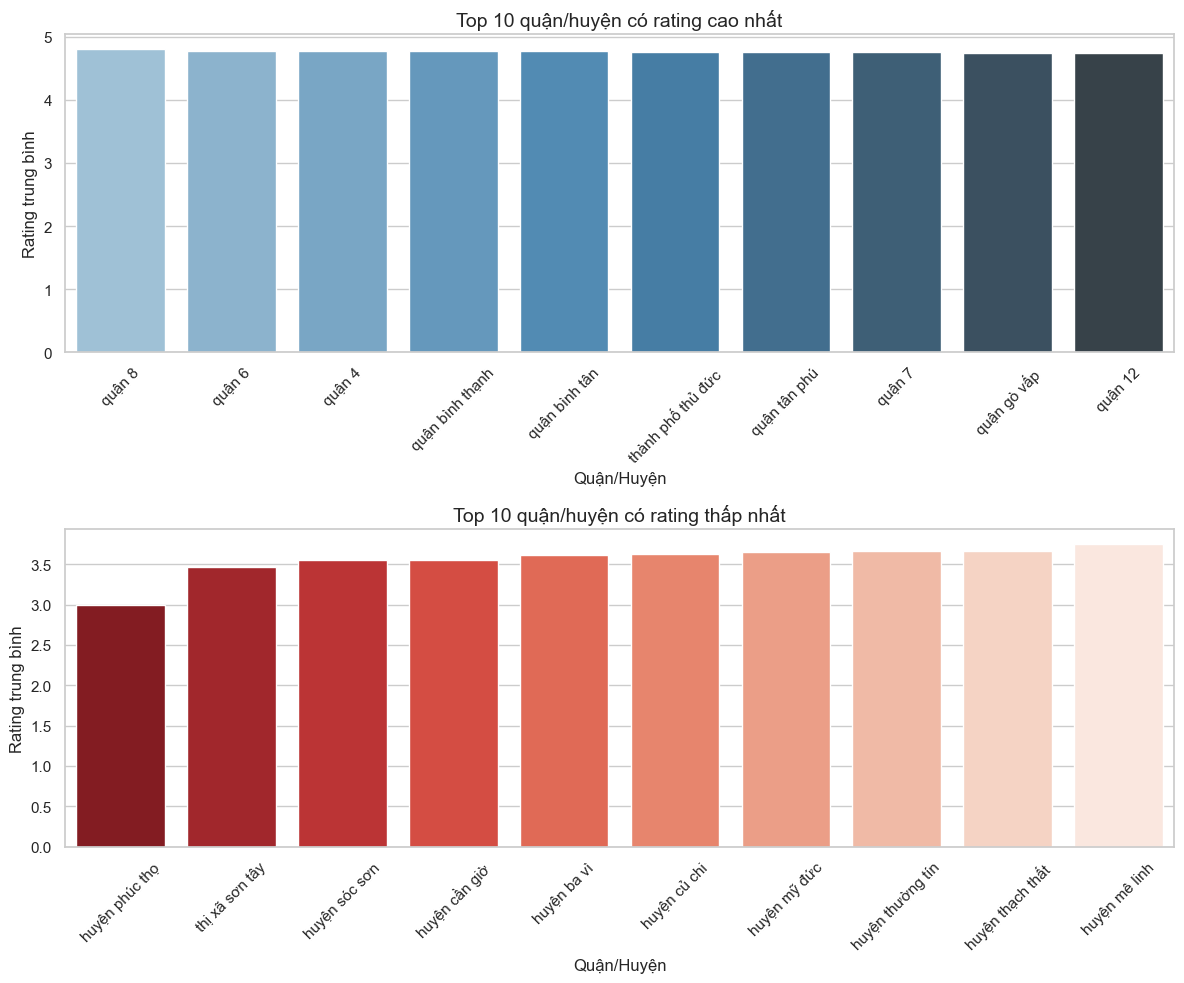

In [ ]:
# Top 10 Districts with Highest and Lowest Average Ratings
# Filter ID
reviews["restaurant_id"] = reviews["restaurant_id"].astype(str).str.strip().str.upper()
restaurants["restaurant_id"] = restaurants["restaurant_id"].astype(str).str.strip().str.upper()

# Loại bỏ district_id nếu có sẵn trong reviews (tránh merge lỗi)
if "district_id" in reviews.columns:
    reviews = reviews.drop(columns=["district_id"])

# Merge: reviews → district_id
df_restaurant_district = restaurants[["restaurant_id", "district_id"]].drop_duplicates()
df = reviews.merge(df_restaurant_district, on="restaurant_id", how="left")

# Merge tiếp với district_name
df = df.merge(districts, on="district_id", how="left")

# Làm sạch rating
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df = df.dropna(subset=["district_id", "district_name", "rating"])

# Tính rating trung bình theo quận
district_rating = (
    df.groupby(["district_id", "district_name"])["rating"]
    .mean()
    .reset_index()
    .rename(columns={"rating": "avg_rating"})
)

# Lấy top 10 cao nhất và thấp nhất
top10_high = district_rating.sort_values("avg_rating", ascending=False).head(10)
top10_low = district_rating.sort_values("avg_rating", ascending=True).head(10)

# Vẽ biểu đồ bằng seaborn
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Biểu đồ rating cao nhất
sns.barplot(
    data=top10_high,
    x="district_name",
    y="avg_rating",
    ax=axs[0],
    palette="Blues_d"
)
axs[0].set_title("Top 10 quận/huyện có rating cao nhất", fontsize=14)
axs[0].set_xlabel("Quận/Huyện")
axs[0].set_ylabel("Rating trung bình")
axs[0].tick_params(axis='x', rotation=45)

# Biểu đồ rating thấp nhất
sns.barplot(
    data=top10_low,
    x="district_name",
    y="avg_rating",
    ax=axs[1],
    palette="Reds_r"
)
axs[1].set_title("Top 10 quận/huyện có rating thấp nhất", fontsize=14)
axs[1].set_xlabel("Quận/Huyện")
axs[1].set_ylabel("Rating trung bình")
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [65]:
reviews["review_time"] = pd.to_datetime(reviews["review_time"], errors="coerce", dayfirst=True)
reviews["year"] = reviews["review_time"].dt.year
reviews["month"] = reviews["review_time"].dt.month
reviews["month_name"] = reviews["review_time"].dt.strftime("%b")
reviews["month_year"] = reviews["review_time"].dt.strftime("%m-%Y")
reviews["day_of_week"] = reviews["review_time"].dt.day_name()

C:\Users\vumin\AppData\Local\Temp\ipykernel_10192\722985728.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=review_counts.index, y=review_counts.values, palette="viridis")


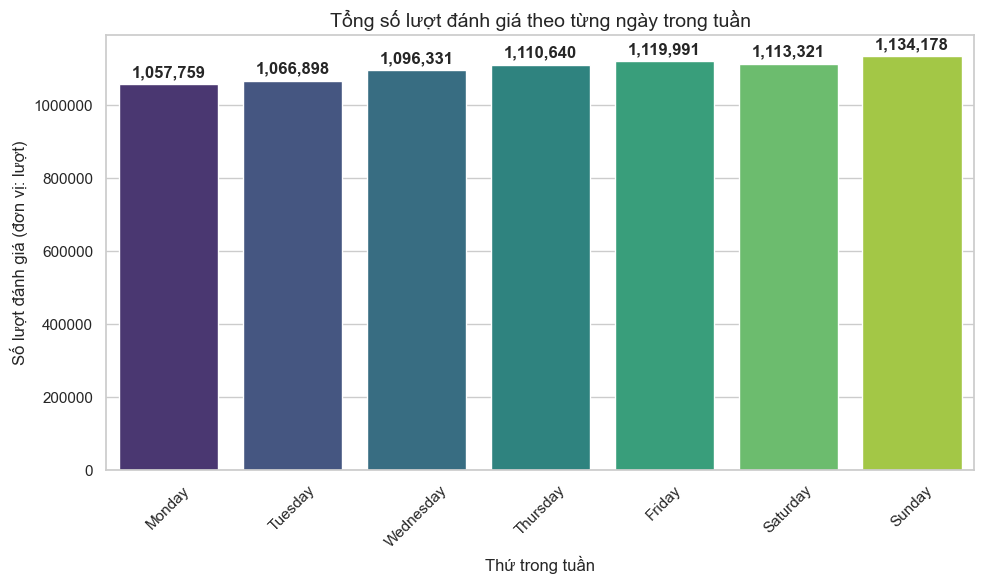

In [ ]:
# Đếm lượt đánh giá theo thứ trong tuần
review_counts = reviews["day_of_week"].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

# Vẽ biểu đồ chính xác, số đẹp
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=review_counts.index, y=review_counts.values, palette="viridis")

# Hiển thị số lượt đánh giá trên đầu mỗi cột (có dấu phẩy ngăn cách hàng nghìn)
for i, v in enumerate(review_counts.values):
    ax.text(i, v + max(review_counts.values)*0.01, f"{v:,.0f}", ha='center', va='bottom', fontweight='bold')

# Tuỳ chỉnh trục và nhãn
plt.title("Tổng số lượt đánh giá theo từng ngày trong tuần", fontsize=14)
plt.xlabel("Thứ trong tuần")
plt.ylabel("Số lượt đánh giá (đơn vị: lượt)")
plt.ticklabel_format(axis='y', style='plain')  # ← tắt 1e6, hiển thị số nguyên bình thường
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\vumin\AppData\Local\Temp\ipykernel_10192\3026096915.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=review_counts_by_month, x="month", y="count", palette="magma")


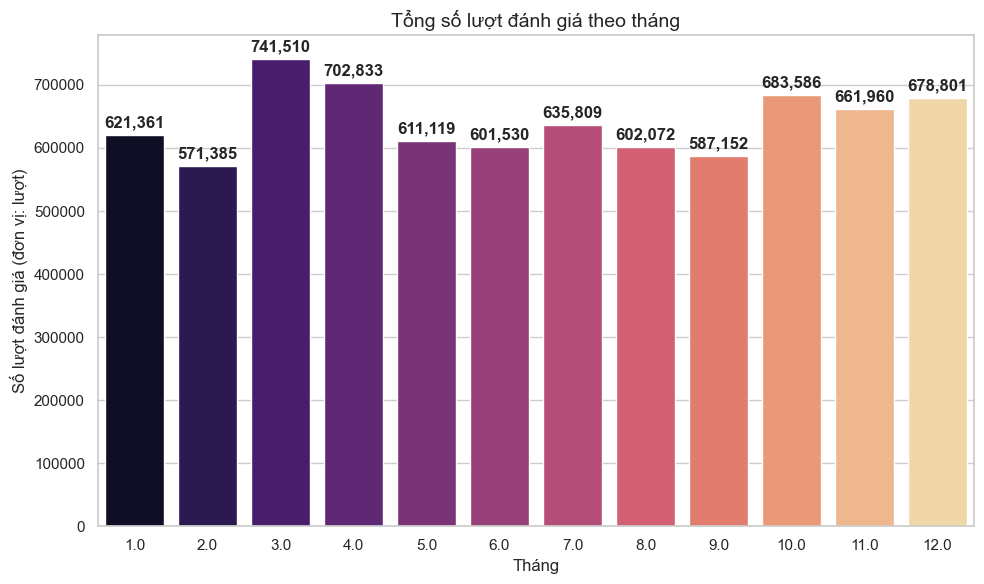

In [ ]:
# Đếm số review theo tháng
review_counts_by_month = (
    reviews.groupby(["month_num", "month"])
    .size()
    .reset_index(name="count")
    .sort_values("month_num")
)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=review_counts_by_month, x="month", y="count", palette="magma")

# Hiển thị số lượt đánh giá trên mỗi cột
for i, v in enumerate(review_counts_by_month["count"]):
    ax.text(i, v + max(review_counts_by_month["count"])*0.01, f"{v:,.0f}", ha='center', va='bottom', fontweight='bold')

# Tùy chỉnh trục
plt.title("Tổng số lượt đánh giá theo tháng", fontsize=14)
plt.xlabel("Tháng")
plt.ylabel("Số lượt đánh giá (đơn vị: lượt)")
plt.ticklabel_format(axis='y', style='plain')  # Hiển thị số bình thường, không dùng scientific
plt.tight_layout()
plt.show()


C:\Users\vumin\AppData\Local\Temp\ipykernel_10192\455842139.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=review_counts_by_year, x="year", y="count", palette="cubehelix")


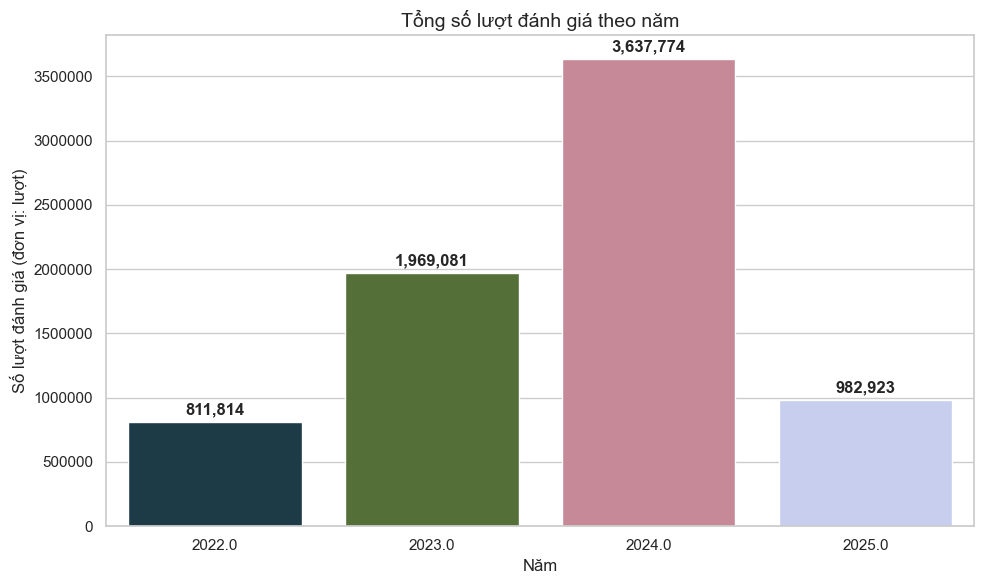

In [ ]:
# Đếm lượt đánh giá theo năm và lọc từ 2022 trở đi
review_counts_by_year = (
    reviews[reviews["year"] >= 2022]        # 👈 lọc tại đây
    .groupby("year")
    .size()
    .reset_index(name="count")
    .sort_values("year")
)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=review_counts_by_year, x="year", y="count", palette="cubehelix")

# Hiển thị số trên đầu cột
for i, v in enumerate(review_counts_by_year["count"]):
    ax.text(i, v + max(review_counts_by_year["count"]) * 0.01, f"{v:,.0f}", ha='center', va='bottom', fontweight='bold')

# Tuỳ chỉnh trục
plt.title("Tổng số lượt đánh giá theo năm", fontsize=14)
plt.xlabel("Năm")
plt.ylabel("Số lượt đánh giá (đơn vị: lượt)")
plt.ticklabel_format(axis='y', style='plain')  # Không dùng 1e6
plt.tight_layout()
plt.show()

In [69]:
df_2024 = reviews[reviews["year"] == 2024]
df_2025 = reviews[reviews["year"] == 2025]

count_2024 = (
    df_2024.groupby("month_name").size().reindex(
        ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    ).reset_index(name="count").rename(columns={"month_name": "month"})
)

count_2025 = (
    df_2025.groupby("month_name").size().reindex(
        ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    ).reset_index(name="count").rename(columns={"month_name": "month"})
)

C:\Users\vumin\AppData\Local\Temp\ipykernel_10192\4027871461.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=count_2024, x="month", y="count", palette="Blues_d", ax=axs[0])
C:\Users\vumin\AppData\Local\Temp\ipykernel_10192\4027871461.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=count_2025, x="month", y="count", palette="Reds_r", ax=axs[1])


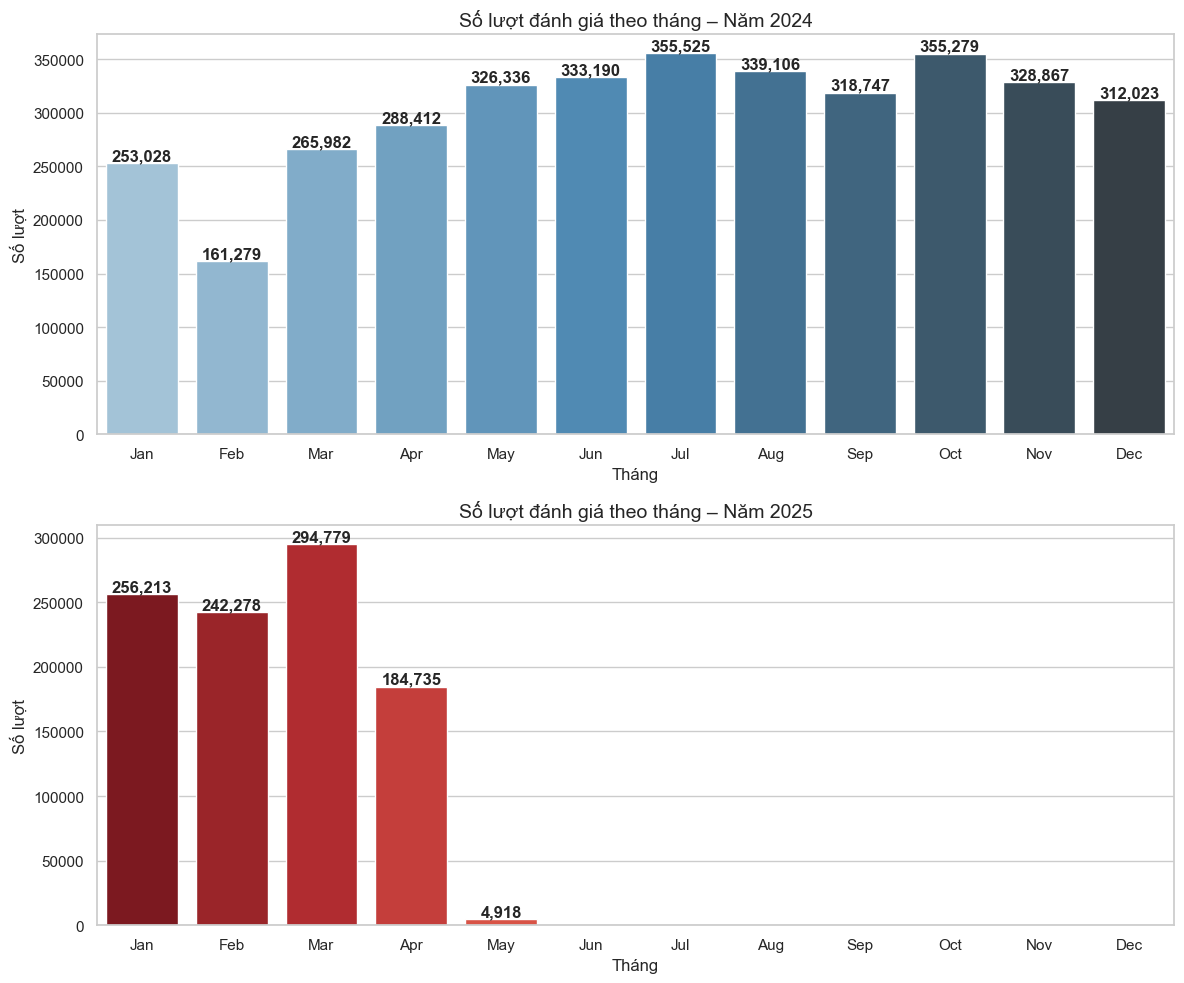

In [ ]:
# Vẽ 2 biểu đồ
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Biểu đồ 2024
sns.barplot(data=count_2024, x="month", y="count", palette="Blues_d", ax=axs[0])
axs[0].set_title("Số lượt đánh giá theo tháng – Năm 2024", fontsize=14)
axs[0].set_xlabel("Tháng")
axs[0].set_ylabel("Số lượt")
for i, v in enumerate(count_2024["count"]):
    if pd.notna(v):
        axs[0].text(i, v + 1, f"{int(v):,}", ha='center', va='bottom', fontweight='bold')

# Biểu đồ 2025
sns.barplot(data=count_2025, x="month", y="count", palette="Reds_r", ax=axs[1])
axs[1].set_title("Số lượt đánh giá theo tháng – Năm 2025", fontsize=14)
axs[1].set_xlabel("Tháng")
axs[1].set_ylabel("Số lượt")
for i, v in enumerate(count_2025["count"]):
    if pd.notna(v):
        axs[1].text(i, v + 1, f"{int(v):,}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()
